In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Bootcamp Data Bangalore/Dataset/sample_submission.csv')

In [ ]:
df.shape

(1459, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
df.isnull().any()

Id           False
SalePrice    False
dtype: bool

## 1. Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice pada data sample submission) lalu interpretasikan!

**Mean**

In [ ]:
sale_mean = df["SalePrice"].mean()
sale_mean

179183.91824266282

**Median**

In [ ]:
df["SalePrice"].median()

179208.66569844898

**Mode**

In [ ]:
df["SalePrice"].mode()

0    174126.297156
1    174388.867433
dtype: float64

**Variance**

In [ ]:
df["SalePrice"].var()

272854335.6813673

**Standard Deviation**

In [ ]:
df["SalePrice"].std()

16518.30305089985

**Range**

In [ ]:
m1=df["SalePrice"].max()
m1
m2=df["SalePrice"].min()
m2
range=m1-m2
range

145892.65722397002

**Quartile**

In [ ]:
Q1=df["SalePrice"].quantile(0.25)
Q1
Q3=df["SalePrice"].quantile(0.75)
Q3
IQR=Q3-Q1
IQR

18086.398161694495

**Describe**

In [ ]:
df["SalePrice"].describe()

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64

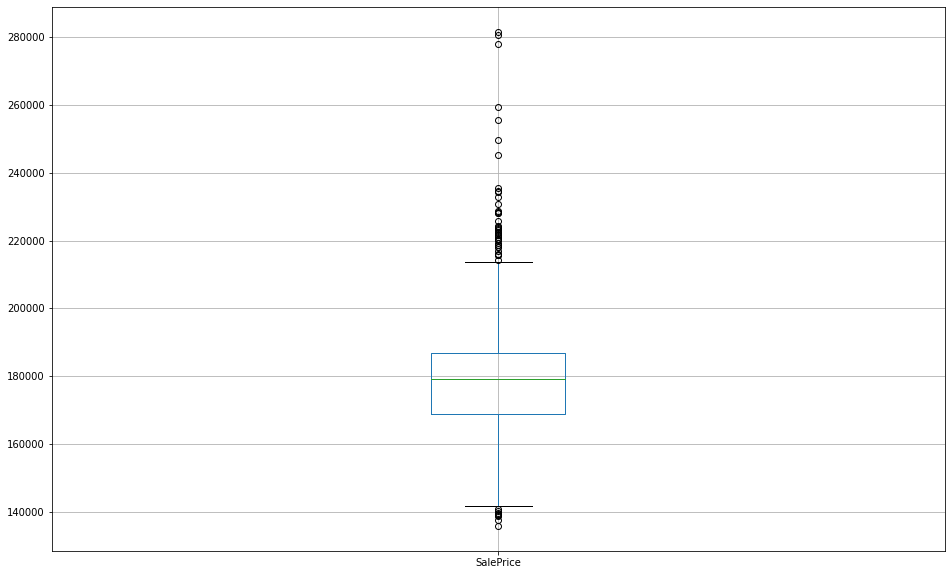

In [ ]:
plt.figure(figsize = (16,10))
df.boxplot(column="SalePrice")


Dapat kita lihat pada diagram Box Plot, nilai minimal 135751.318893; Q1 168703.011202; Median 179208.665698; Q3 186789.409363; dan nilai maksimal 281643.976117.

## 2. Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

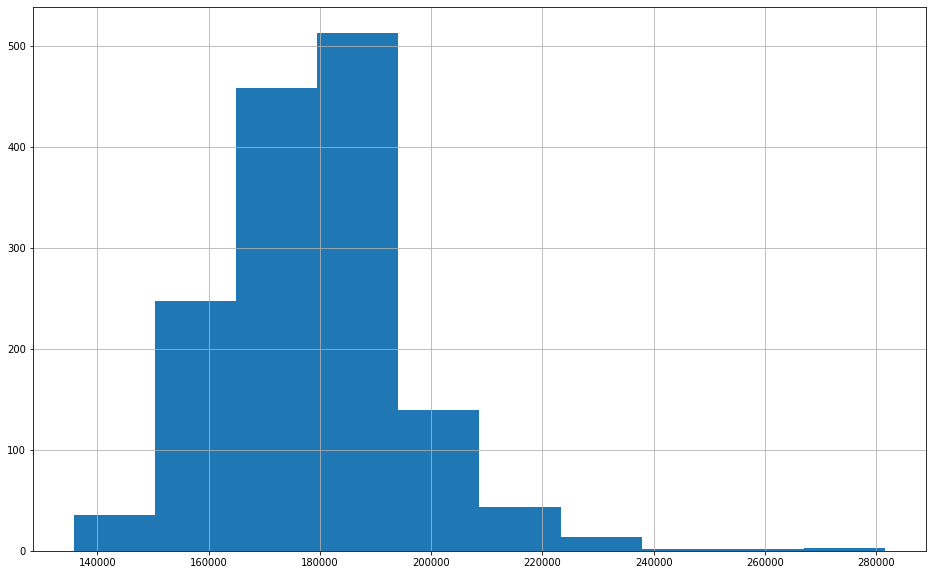

In [ ]:
plt.figure(figsize = (16,10))
df["SalePrice"].hist()

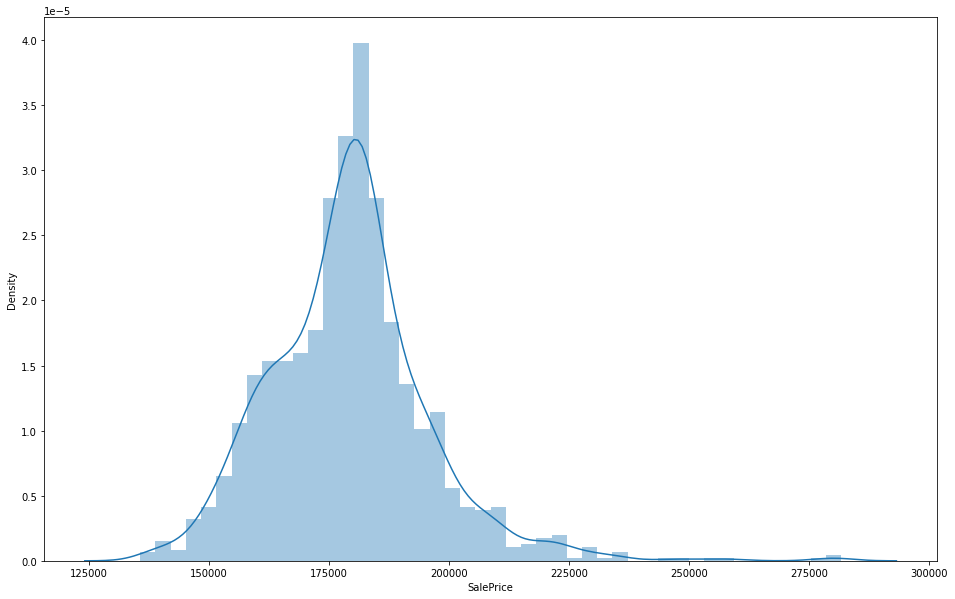

In [ ]:
plt.figure(figsize = (16,10))
sns.distplot(df["SalePrice"])

Distribusi yang dihasilkan merupakan distribusi normal

Secara analisis menggunakan mean. karena mean digunakan sebagai pusat distribusi atau penyebaran nilai lainnya. Nilai tersebut akan menentukan lokasi titik puncak dalam kurva lonceng, sedangkan nilai-nilai lainnya akan menyebar mengikuti rerata

## 3. Lakukan sampling untuk data tersebut dengan margin of error 5%! Lakukan pengujian hipotesis untuk harga rumah (Kolom: SalePrice).

In [ ]:
import scipy.stats

def mean_confidence_interval(df, confidence=0.05):
    a = 1.0 * np.array(df)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(df["SalePrice"])

(179183.91824266256, 179156.79591052065, 179211.04057480447)